In [82]:
# Hiển thị 10 dòng đầu tiên và 10 dòng cuối cùng của bảng dữ liệu.
import pandas as pd
import numpy as np

df = pd.read_csv("data/diem_thi_thpt_2022.csv", header=0)
df.head(10)
df.tail(10)
df["sbd"].isna().sum()

0

In [16]:
# Cho biết thông tin về các cột dữ liệu và kiểu của từng cột trong bảng
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982726 entries, 0 to 982725
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sbd        982726 non-null  int64  
 1   toan       982726 non-null  float64
 2   ngu_van    968865 non-null  float64
 3   ngoai_ngu  870073 non-null  float64
 4   vat_li     325505 non-null  float64
 5   hoa_hoc    327342 non-null  float64
 6   sinh_hoc   322172 non-null  float64
 7   lich_su    647514 non-null  float64
 8   dia_li     645308 non-null  float64
 9   gdcd       553490 non-null  float64
 10  tentinh    982726 non-null  object 
 11  Khoi       858736 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 90.0+ MB


In [58]:
# Cho biết số  học sinh bị thiếu điểm môn Ngữ Văn và môn Ngoại Ngữ
data1=df["ngoai_ngu"].isna().sum()
data1

112653

In [70]:
# Với cột điểm thi môn Toán, hãy tính các trị thống kê:
# a)	(0.75đ) Trung binh (mean), 
# b)	(0.75đ) Độ lệch chuẩn (standard deviation) 
# c)	(0.75đ) Và khoảng dữ liệu (range)
df["toan"].mean()
data1 = df["toan"].max()- df["toan"].min()
data1

10.0

In [120]:
# ) Dựa vào dữ liệu cột Khoi, anh/chị hãy thực hiện:
# a)	(0.75đ) Đếm số lượng học sinh thi khối "KHTN" và thi khối "KHXH"
#b)	(0.75đ) Vẽ đồ thị Pie để so sánh mối tương quan giữa "KHTN" và "KHXH".
khtn = (df["Khoi"]=="KHTN").sum()
print(f"khtn: {khtn}")

khxh = (df["Khoi"]=="KHXH").sum()
print(f"khxh: {khxh}")

khtn: 309162
khxh: 549574


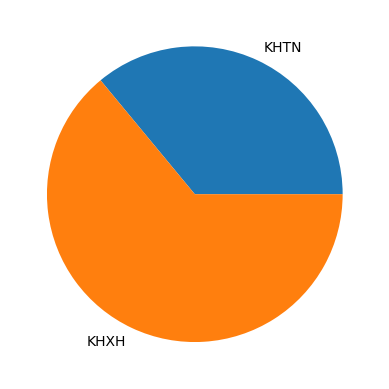

In [124]:
import matplotlib.pyplot as plt
y = [ khtn, khxh]
mylabels = ["KHTN", "KHXH"]

plt.pie(y, labels = mylabels)
plt.show()

In [132]:

df.sort_values(by="toan", ascending=True).head(10)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,tentinh,Khoi
19132,1019834,0.0,7.25,9.4,NaN,NaN,NaN,7.75,6.50,8.25,thành phố hà nội,KHXH
500465,28027937,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tỉnh thanh hóa,NaN
861431,52009551,0.0,5.75,NaN,NaN,NaN,NaN,3.00,5.75,NaN,tỉnh bà rịa - vũng tàu,NaN
671971,39009635,0.2,NaN,NaN,NaN,0.25,4.75,NaN,NaN,NaN,tỉnh phú yên,NaN
799556,48027390,0.4,4.25,NaN,NaN,NaN,NaN,6.75,5.25,NaN,tỉnh đồng nai,NaN
617975,35005460,0.4,2.00,2.2,NaN,NaN,NaN,7.25,5.25,5.25,tỉnh quảng ngãi,KHXH
275167,13004329,0.4,5.25,2.8,NaN,NaN,NaN,4.50,4.50,6.25,tỉnh yên bái,KHXH
515602,29005631,0.6,4.25,2.2,NaN,NaN,NaN,3.50,3.50,6.00,tỉnh nghệ an,KHXH
678601,40005436,0.6,4.58,2.2,NaN,NaN,NaN,6.00,5.50,7.25,tỉnh đắk lắk,KHXH
399423,22008620,0.6,3.00,NaN,NaN,NaN,NaN,5.25,5.50,NaN,tỉnh hưng yên,NaN


In [140]:
data1 = (df["toan"] == 10).sum()
data1

35

In [166]:
df_new = df.loc[df["tentinh"].isin(["thành phố hà nội", "thành phố hồ chí minh", "thành phố đà nẵng"])]
data = df_new.groupby(["tentinh"])["sbd"].count()
data.values

array([95769, 84094, 12433], dtype=int64)

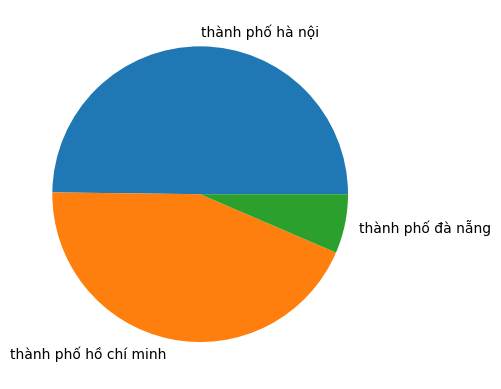

In [168]:
y = data.values
mylabels = data.index

plt.pie(y, labels = mylabels)
plt.show()